# About Dataset


# Librerie e dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Analisi esplorativa

1. Importazione di un dataset di lavoro
2. Comprensione del quadro generale
3. Preparazione
4. Comprensione delle variabili
5. Studio delle relazioni tra variabili
6. Brainstorming

# Analisi esplorativa

### 1. Importazione di un dataset di lavoro

In [4]:
file_dataset = 'neo.csv'

df = pd.read_csv(file_dataset)

df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


### 2. Comprensione del quadro generale

**Obiettivo:** capire il problema che vogliamo andare a risolvere, andando a ragionare sull’intero dataset e sul significato delle variabili.

Grandezza del dataset 

In [5]:
df.shape

(90836, 10)

Variabili

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


Descrizione generale del dataset

In [7]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


### 3. Preparazione del dataset 

* esistono variabili inutili o ridondanti?
* la nomenclatura ha senso?
* ci sono delle nuove variabili che vogliamo creare?

Cerchiamo se ci sono righe duplicate

In [8]:
df.duplicated().sum()

0

In questo dataset non ci sono righe duplicate e disponiamo di una nomenclatura delle variabili già soddisfaciente, inoltre per il momento non si vede la necessità di creare nuove variabili.

In [9]:
# Contare il numero di valori null per colonna
conteggio_valori_null = df.isnull().sum()

# Visualizzare il risultato
print(conteggio_valori_null)


id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


Qui eliminiamo le seguenti variabili:

* name
* sentry_object
* orbiting_body

Infatti, come si nota dai grafici sottostanti "sentry_object" e "orbiting_body" hanno sempre lo stesso valore in tutto il dataset, invece "name" non reputiamo essere una variabile utile.

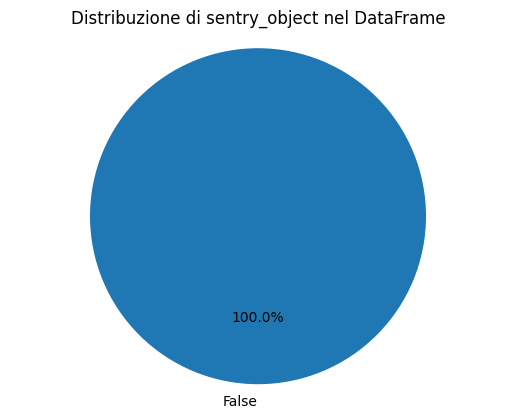

In [10]:
# Conta le occorrenze di ciascun valore nella variabile "sentry_object"
conteggio_categorie = df['sentry_object'].value_counts()

# Crea il grafico a torta
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=90)

# Imposta l'aspetto di cerchio per assicurarsi che il grafico a torta sia circolare
plt.axis('equal')

# Aggiungi un titolo al grafico
plt.title('Distribuzione di sentry_object nel DataFrame')

# Mostra il grafico
plt.show()

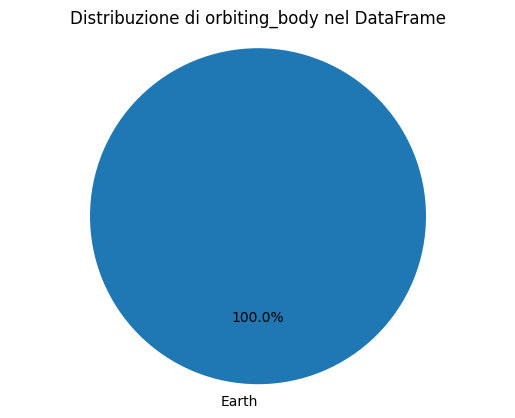

In [11]:
# Conta le occorrenze di ciascun valore nella variabile "sentry_object"
conteggio_categorie = df['orbiting_body'].value_counts()

# Crea il grafico a torta
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=90)

# Imposta l'aspetto di cerchio per assicurarsi che il grafico a torta sia circolare
plt.axis('equal')

# Aggiungi un titolo al grafico
plt.title('Distribuzione di orbiting_body nel DataFrame')

# Mostra il grafico
plt.show()

In [12]:
colonne_da_rimuovere=["name","sentry_object","orbiting_body"]
df = df.drop(colonne_da_rimuovere, axis = 1)
df

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...
90831,3763337,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


### 4. Analisi univariata

Fase utile nel comprendere e descrivere le variabili di interesse.
In questo caso ci concentreremo sulle variabili "categoriali" e cercehremo di capire quanto sono bilanciate le classi all'interno del dataset

**hazardous**

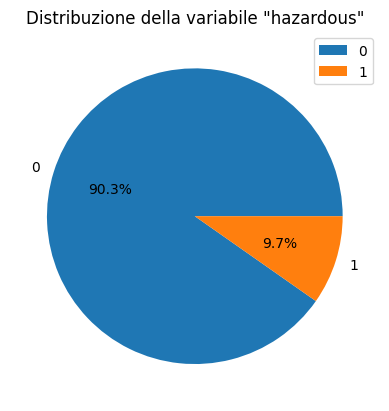

In [13]:
plt.pie(df["hazardous"].value_counts(), labels=["0", "1"], autopct='%1.1f%%')
plt.legend()
plt.title("Distribuzione della variabile \"hazardous\"")
plt.show()

**est_diameter_min**

In [14]:
df.est_diameter_min.describe()

count    90836.000000
mean         0.127432
std          0.298511
min          0.000609
25%          0.019256
50%          0.048368
75%          0.143402
max         37.892650
Name: est_diameter_min, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


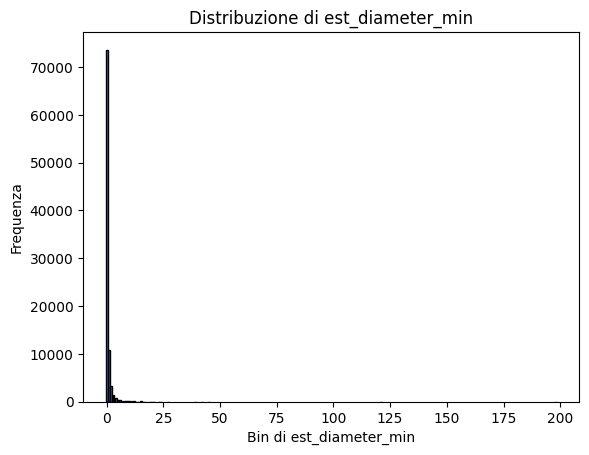

In [15]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["est_diameter_min"].min(), df["est_diameter_min"].max(), 200)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['est_diameter_min'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di est_diameter_min')
plt.xlabel('Bin di est_diameter_min')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [16]:
print(f"Curtosi: {df['est_diameter_min'].kurt()}")
print(f"Asimmetria: {df['est_diameter_min'].skew()}")

Curtosi: 4017.3798686529044
Asimmetria: 41.1399519487211


**est_diameter_max**

In [17]:
df.est_diameter_max.describe()

count    90836.000000
mean         0.284947
std          0.667491
min          0.001362
25%          0.043057
50%          0.108153
75%          0.320656
max         84.730541
Name: est_diameter_max, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


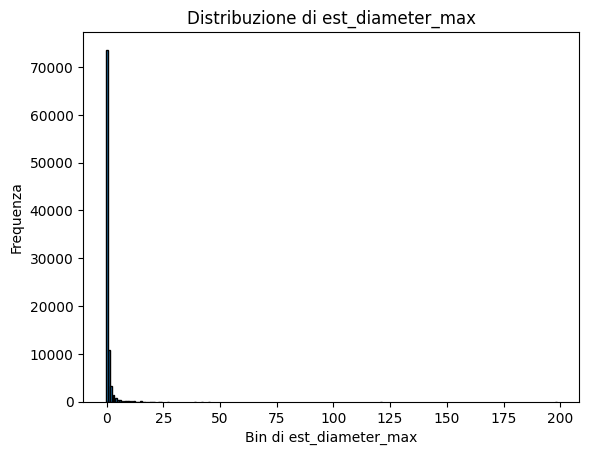

In [18]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["est_diameter_max"].min(), df["est_diameter_max"].max(), 200)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['est_diameter_max'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di est_diameter_max')
plt.xlabel('Bin di est_diameter_max')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [19]:
print(f"Curtosi: {df['est_diameter_max'].kurt()}")
print(f"Asimmetria: {df['est_diameter_max'].skew()}")

Curtosi: 4017.379868686785
Asimmetria: 41.139951948962064


**relative_velocity**

In [20]:
df.relative_velocity.describe()

count     90836.000000
mean      48066.918918
std       25293.296961
min         203.346433
25%       28619.020645
50%       44190.117890
75%       62923.604633
max      236990.128088
Name: relative_velocity, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


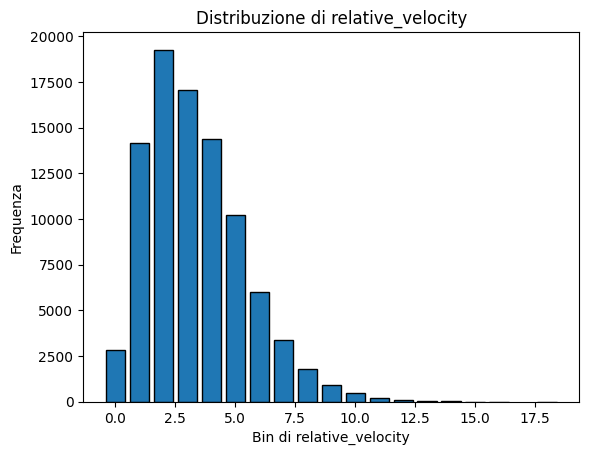

In [21]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["relative_velocity"].min(), df["relative_velocity"].max(), 20)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['relative_velocity'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di relative_velocity')
plt.xlabel('Bin di relative_velocity')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [22]:
print(f"Curtosi: {df['relative_velocity'].kurt()}")
print(f"Asimmetria: {df['relative_velocity'].skew()}")

Curtosi: 0.9948353130313032
Asimmetria: 0.9051249321533839


**miss_distance**

In [23]:
df.miss_distance.describe()

count    9.083600e+04
mean     3.706655e+07
std      2.235204e+07
min      6.745533e+03
25%      1.721082e+07
50%      3.784658e+07
75%      5.654900e+07
max      7.479865e+07
Name: miss_distance, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


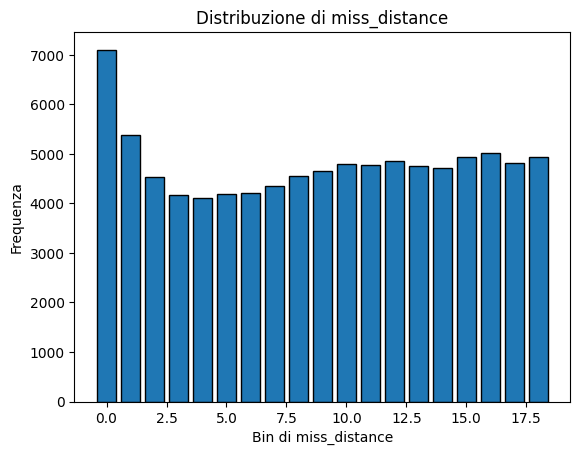

In [24]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["miss_distance"].min(), df["miss_distance"].max(), 20)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['miss_distance'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di miss_distance')
plt.xlabel('Bin di miss_distance')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [25]:
print(f"Curtosi: {df['miss_distance'].kurt()}")
print(f"Asimmetria: {df['miss_distance'].skew()}")

Curtosi: -1.2384548852282553
Asimmetria: -0.04270598169888323


**absolute_magnitude**

In [26]:
df.absolute_magnitude.describe()

count    90836.000000
mean        23.527103
std          2.894086
min          9.230000
25%         21.340000
50%         23.700000
75%         25.700000
max         33.200000
Name: absolute_magnitude, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


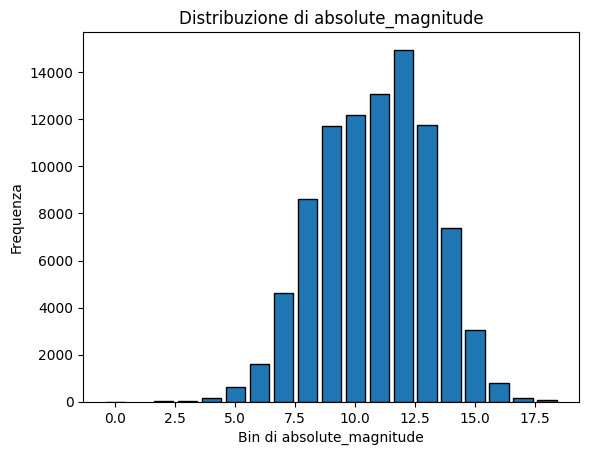

In [27]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["absolute_magnitude"].min(), df["absolute_magnitude"].max(), 20)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['absolute_magnitude'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di absolute_magnitude')
plt.xlabel('Bin di absolute_magnitude')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [28]:
print(f"Curtosi: {df['absolute_magnitude'].kurt()}")
print(f"Asimmetria: {df['absolute_magnitude'].skew()}")

Curtosi: -0.4449527026542426
Asimmetria: -0.13741956613464948


**Media tra est_diameter_max e est_diameter_min**

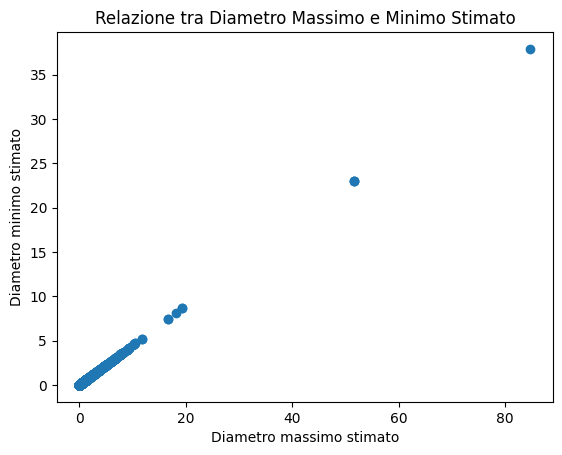

In [29]:
# Aggiungi la variabile di media
df['media_diametro'] = (df['est_diameter_max'] + df['est_diameter_min']) / 2

# Crea un grafico a dispersione per visualizzare la relazione tra est_diameter_max e est_diameter_min
plt.scatter(df['est_diameter_max'], df['est_diameter_min'])
plt.xlabel('Diametro massimo stimato')
plt.ylabel('Diametro minimo stimato')
plt.title('Relazione tra Diametro Massimo e Minimo Stimato')
plt.show()

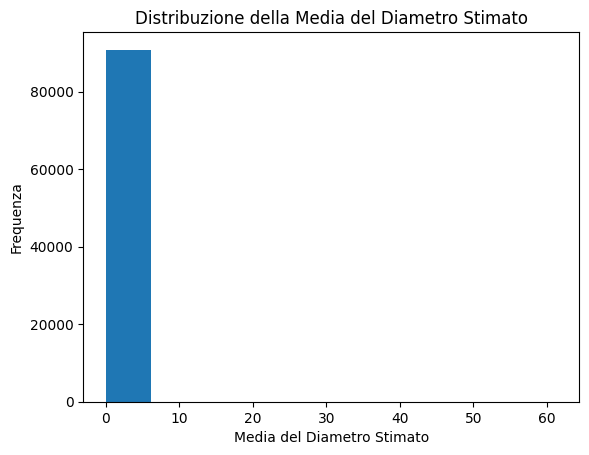

In [30]:
# Crea un istogramma per visualizzare la distribuzione della variabile di media
plt.hist(df['media_diametro'])
plt.xlabel('Media del Diametro Stimato')
plt.ylabel('Frequenza')
plt.title('Distribuzione della Media del Diametro Stimato')
plt.show()

### 4. Studio delle relazioni tra variabili

In [31]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,Bin,media_diametro
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,0.277258,-0.123443,0.273645,-0.148322
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.605552,1.000000
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.605552,1.000000
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185,-0.351068,0.221553
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302,-0.261743,0.142241
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267,0.992122,-0.560188
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000,-0.363147,0.183363
Bin,0.273645,-0.605552,-0.605552,-0.351068,-0.261743,0.992122,-0.363147,1.000000,-0.605552
media_diametro,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.605552,1.000000


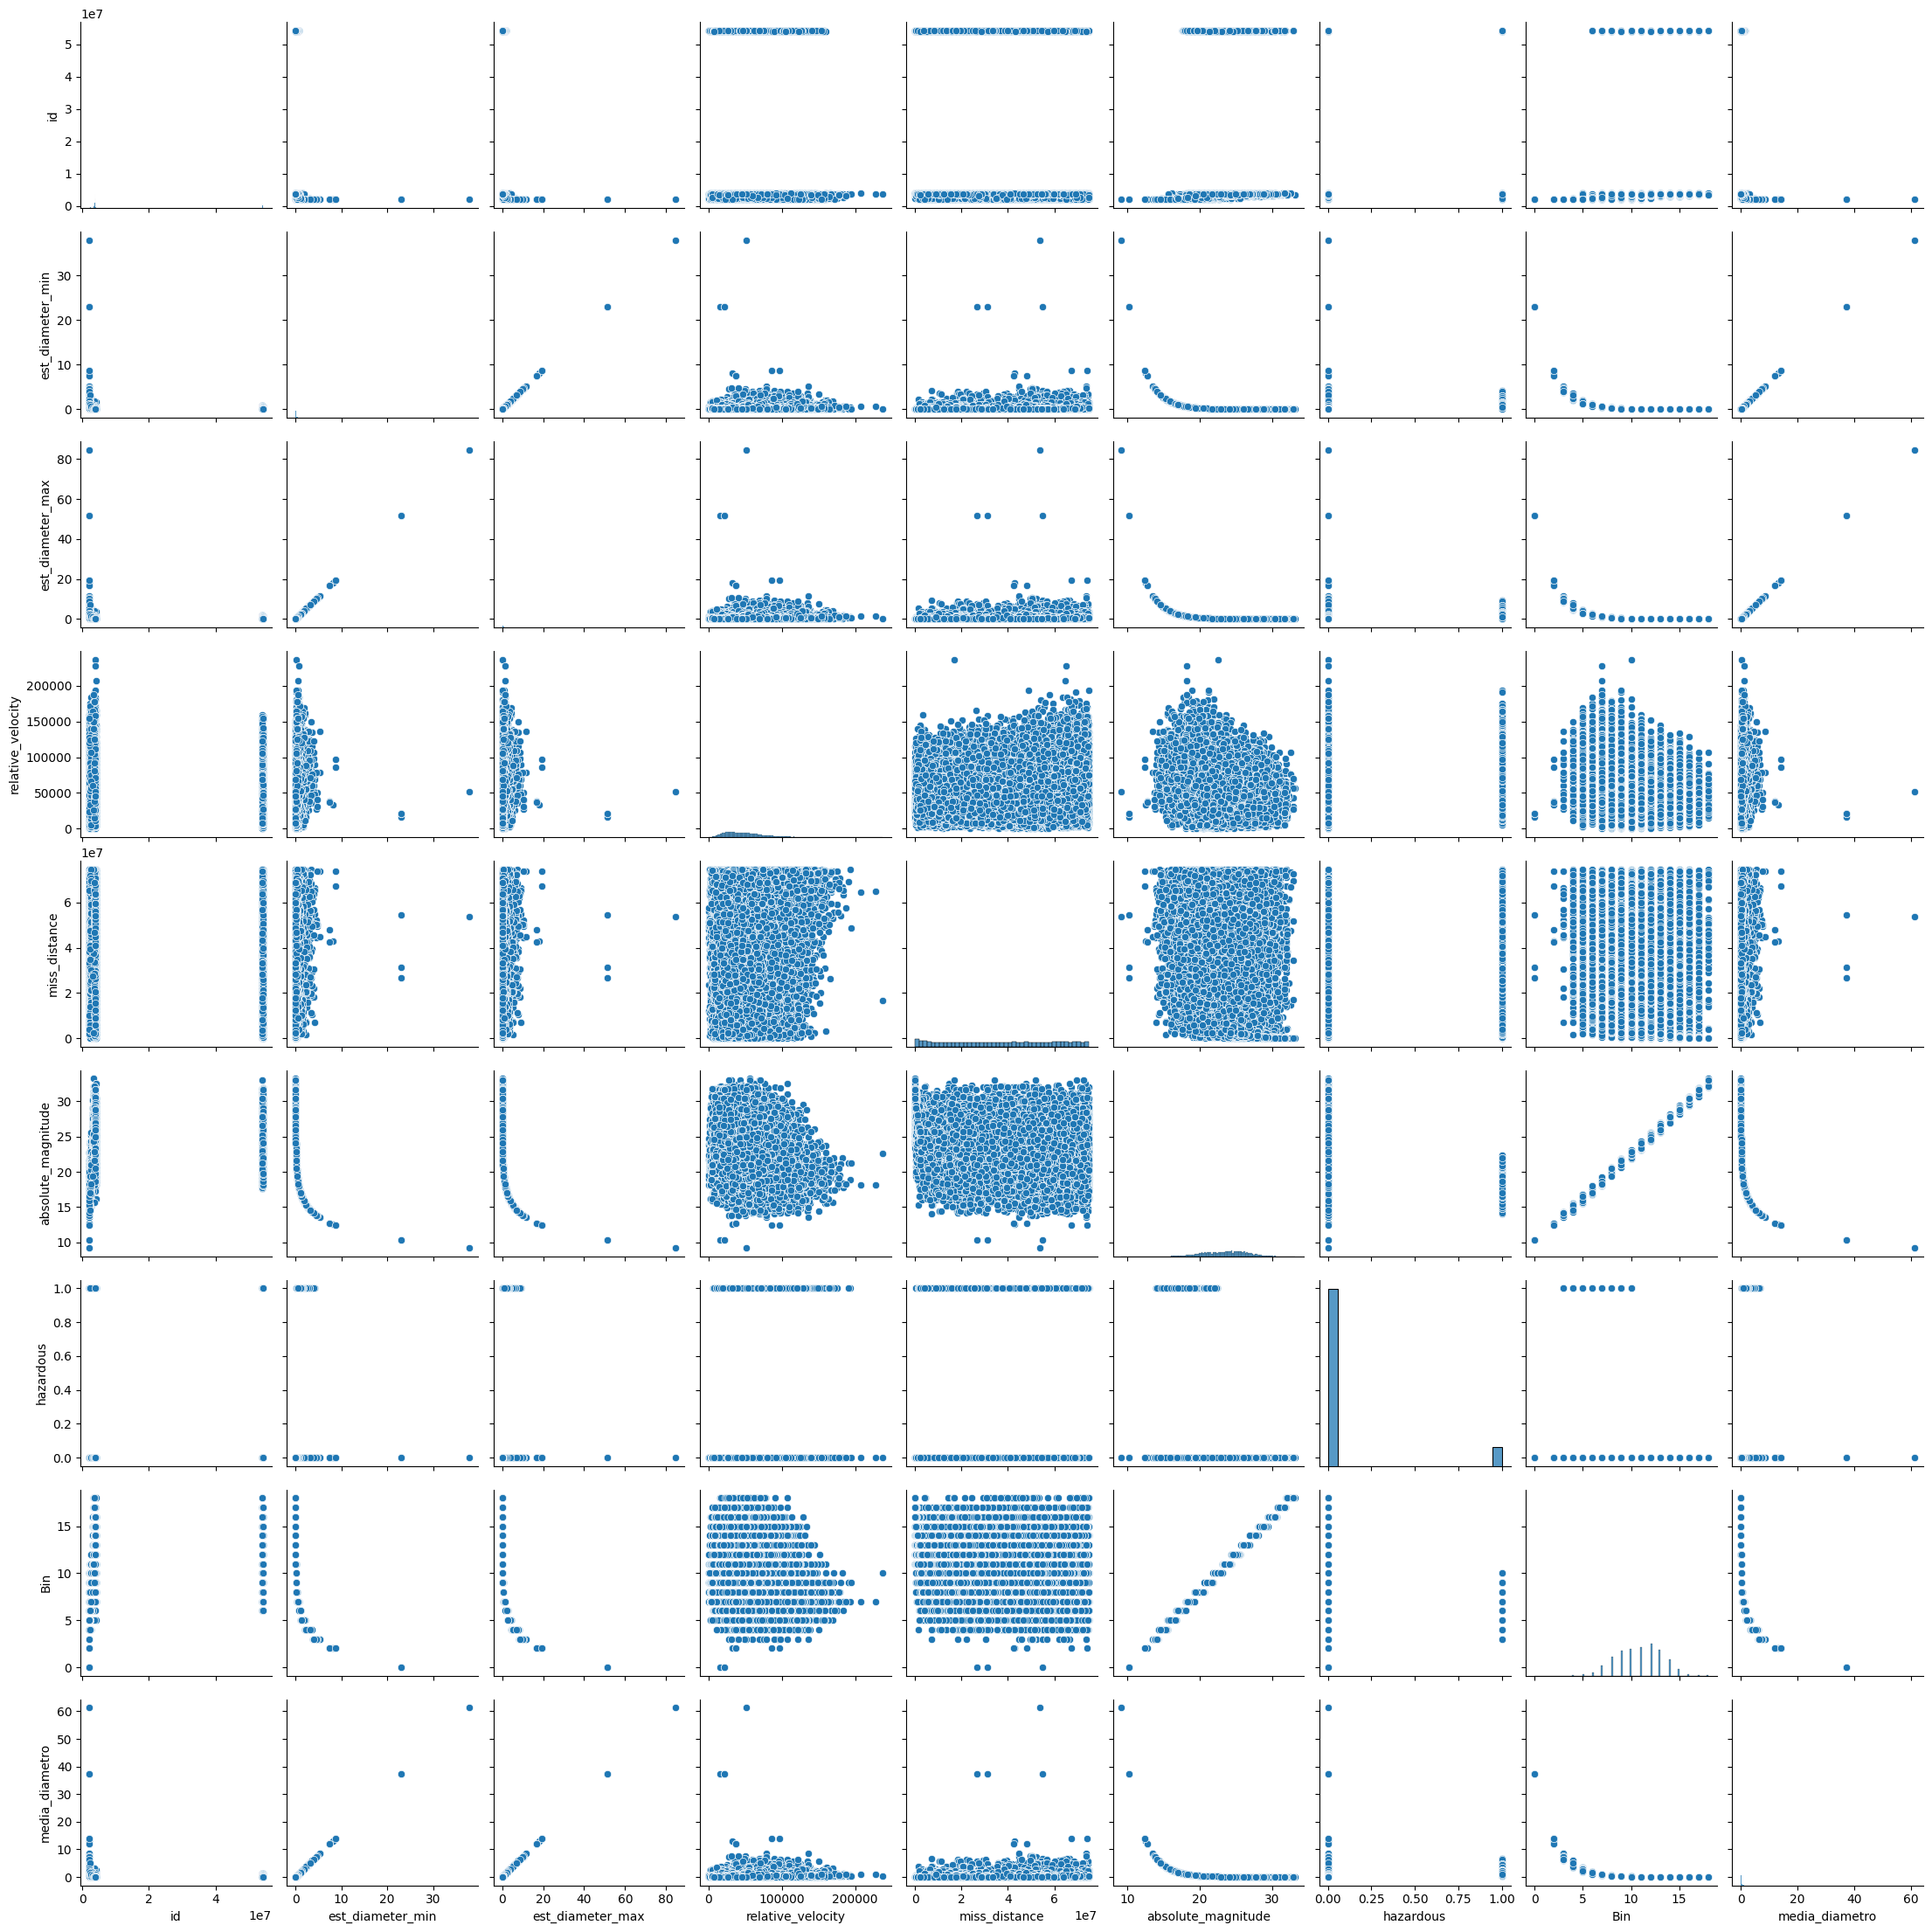

In [32]:
sns.pairplot(df)

In [33]:
df_sampled = df.sample(frac=0.1, random_state=42)  # random_state per riproducibilità


In [34]:
var_list = df.columns.tolist()

var_list.remove("hazardous")
var_list.remove("id")
var_list.remove("Bin")

length_var_list = len(var_list)

var_list

['est_diameter_min',
 'est_diameter_max',
 'relative_velocity',
 'miss_distance',
 'absolute_magnitude',
 'media_diametro']

In [35]:
#Calcola il numero ottimale di classi secondo il metodo di Freedman-Diaconis
def freedman_diaconis_bins(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    h = 2 * iqr / (len(data) ** (1 / 3))
    return int((data.max() - data.min()) / h)

def bar_plot(a, b, df, n_class):
   # Supponendo che df["relative_velocity"] contenga valori float e df["hazardous"] contenga valori booleani

    # Definisci i bin per la suddivisione di relative_velocity
    bins = np.linspace(df[a].min(), df[a].max(), n_class)

    # Crea una colonna 'Bin' nel DataFrame basata sui bin
    df['Bin'] = pd.cut(df[a], bins=bins, labels=False)

    # Raggruppa i dati in base a 'Bin' e 'hazardous', ottenendo la frequenza di True e False in ciascun bin
    grouped = df.groupby(['Bin', b]).size().unstack(fill_value=0)

    # Creiamo il grafico a barre stackato
    ax = grouped.plot(kind='bar', stacked=True)

    # Imposta i ticks sull'asse x
    num_ticks = min(20, len(bins))  # Imposta il numero desiderato di ticks
    plt.locator_params(axis='x', nbins=num_ticks)

    ax.set_title('Distribuzione di ' + b + ' in base a ' + a)
    ax.set_xlabel('Bin di ' + a)
    ax.set_ylabel('Frequenza')

    # Aggiungiamo una legenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title=b)

    df.drop(["Bin"], axis=1)

    plt.show()

def bar_distribution(a, df, n_class):
   #Esempio di utilizzo con dati contenenti outliers
    num_bins_fd = n_class

    #Visualize the distribution of NEOs' miss distance
    #Using the histplot() function from the seaborn library,
    #we generate a histogram to illustrate the distribution of NEO miss distance.
    #The x-axis indicates the miss distance in kilometres, whereas the y-axis indicates
    #the number of NEOs. For improved visualisation, we set the number of segments to 50 and
    #add labels and a title to the plot. Finally, the histogram is displayed using plt.show().

    plt.figure(figsize=(10, 5))
    sns.histplot(df[a], bins=num_bins_fd, kde=True)
    plt.xlabel('Bin di ' + a)
    plt.ylabel('Frequenza')
    plt.title('Distribuzione di ' + b + ' in base a ' + a)
    plt.show()


def boxPlot(a, b, df):
   sns.catplot(x=a, y=b, data=df, kind="box", aspect=1.5)
   plt.title("Boxplot per " + a + " e " + b)
   plt.show()


def scatterPlot(a, b, c, df):
   fig, ax = plt.subplots(figsize=(10, 4))
   sns.scatterplot(x=b, y=a, hue=c, data=df_sampled, palette="Dark2", ax=ax)
   plt.title("Relazione tra" + a + ", " + b + " e " + c)
   plt.show()

   # Finding the count of outliers based on those instances which are out of iqr
def printOutliers(var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    # Finding IQR
    IQR = Q3 - Q1
    da=(df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR))
    print(da.value_counts())

est_diameter_min e hazardous


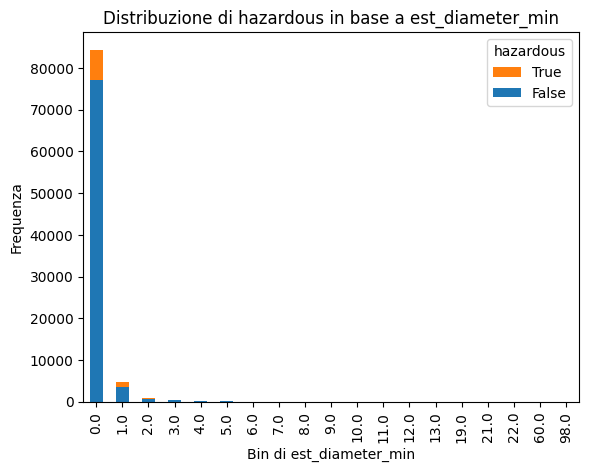

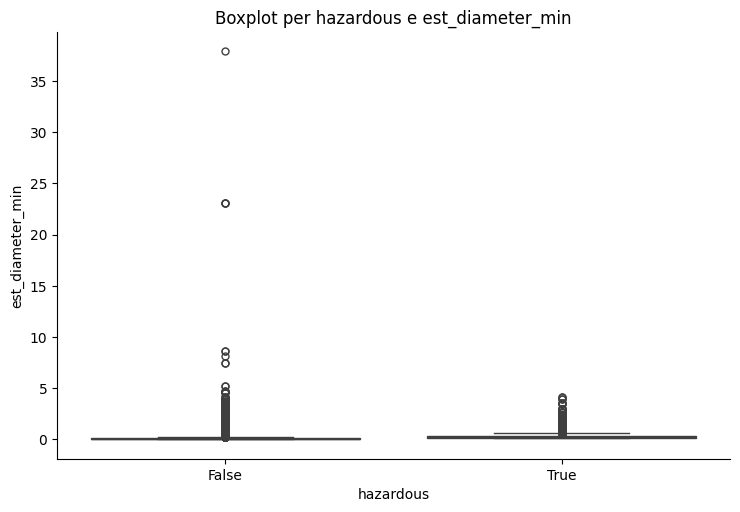

est_diameter_min
False    82530
True      8306
Name: count, dtype: int64
est_diameter_max e hazardous


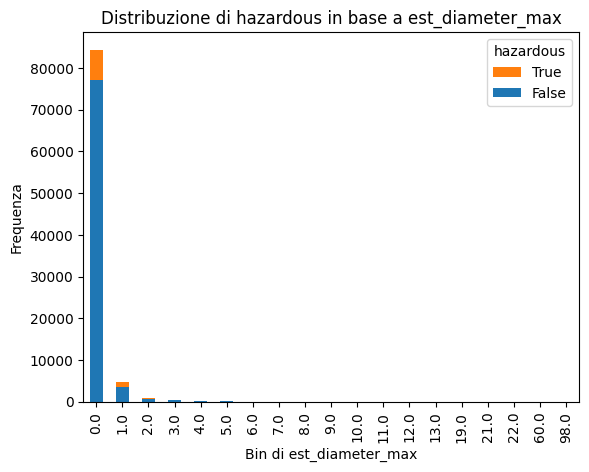

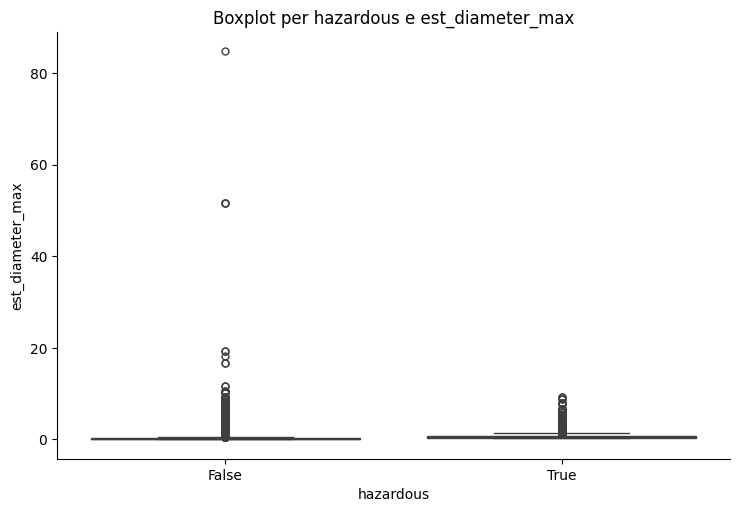

est_diameter_max
False    82530
True      8306
Name: count, dtype: int64
relative_velocity e hazardous


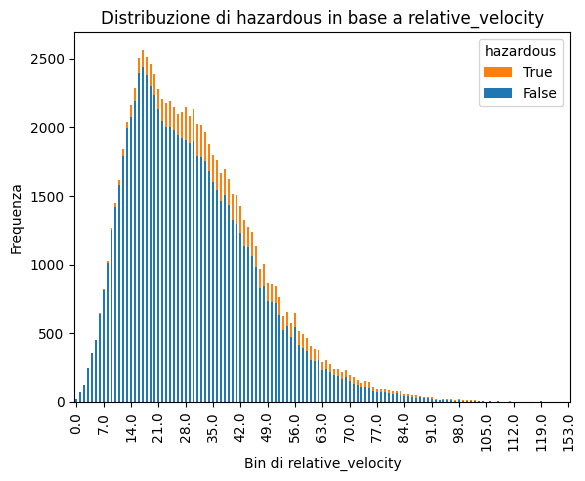

NameError: name 'b' is not defined

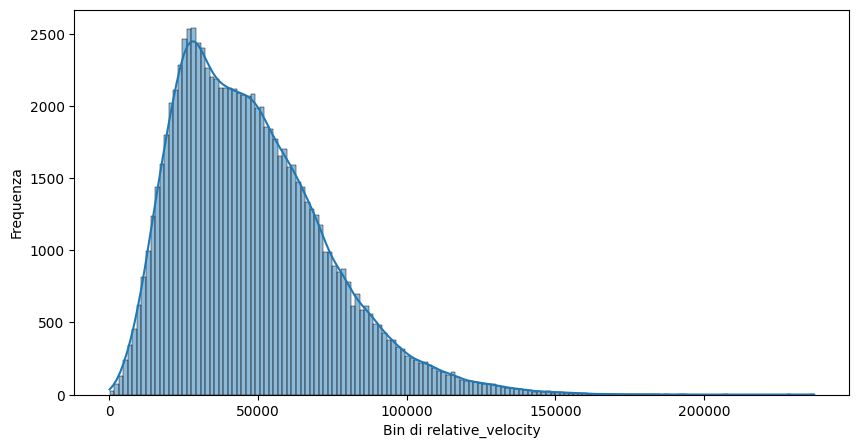

In [36]:
var_list = df.columns.tolist()

var_list.remove("hazardous")
var_list.remove("id")

n_class_diameter = 100

for a in var_list:
    print(a + " e hazardous")
    if a == "est_diameter_min" or a == "est_diameter_max":
        bar_plot(a, "hazardous", df, n_class_diameter)
        boxPlot("hazardous", a, df)
        printOutliers(a)
    elif a != "Bin":
        bar_plot(a, "hazardous", df, freedman_diaconis_bins(df[a])) 
        bar_distribution(a, df, freedman_diaconis_bins(df[a]))
        boxPlot("hazardous", a, df)
        printOutliers(a)

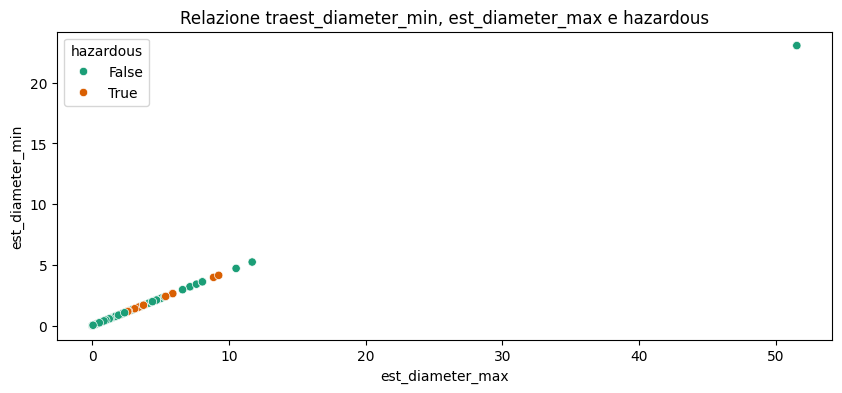

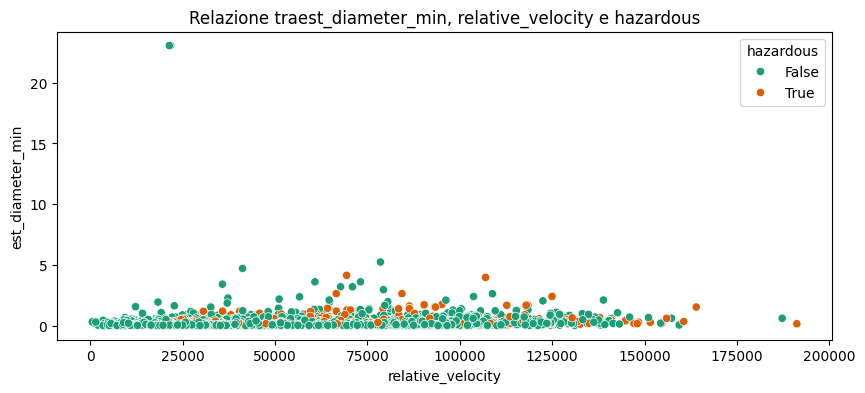

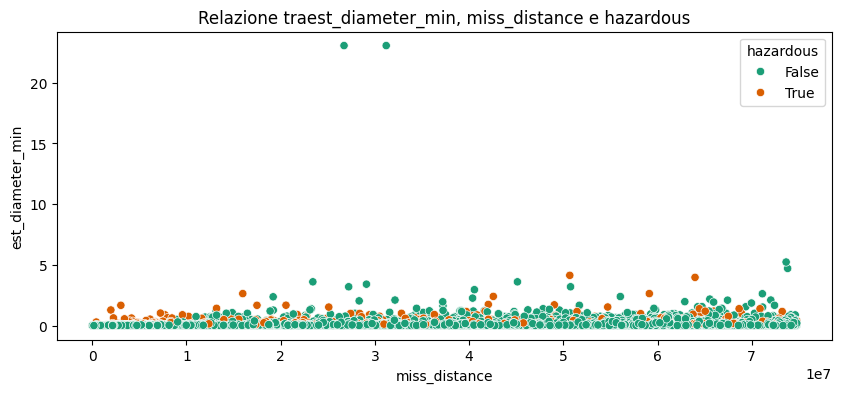

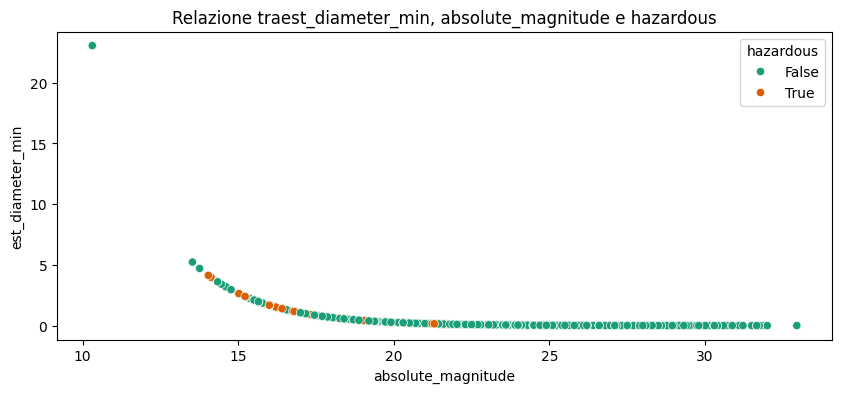

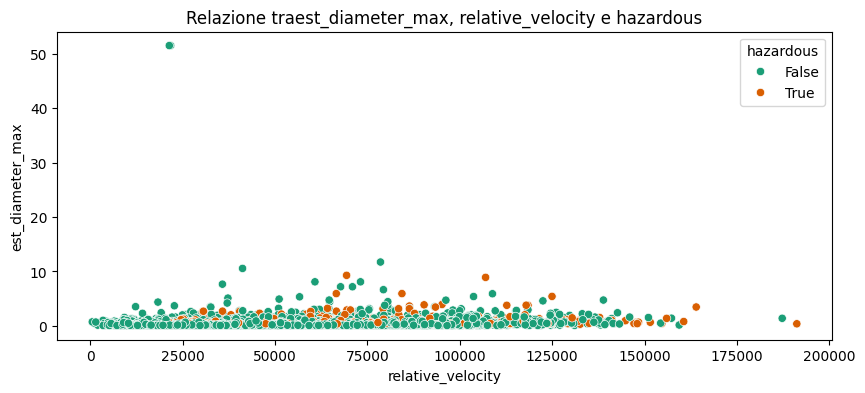

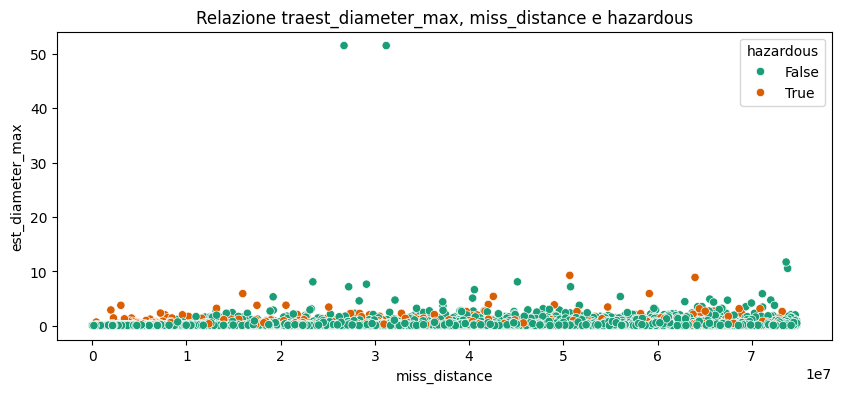

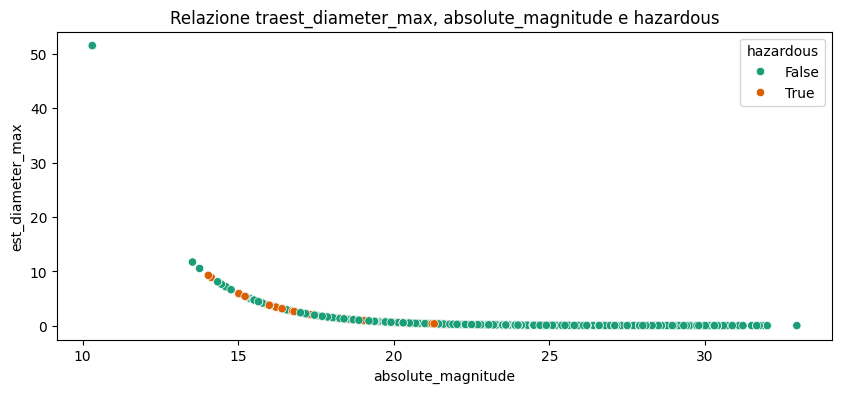

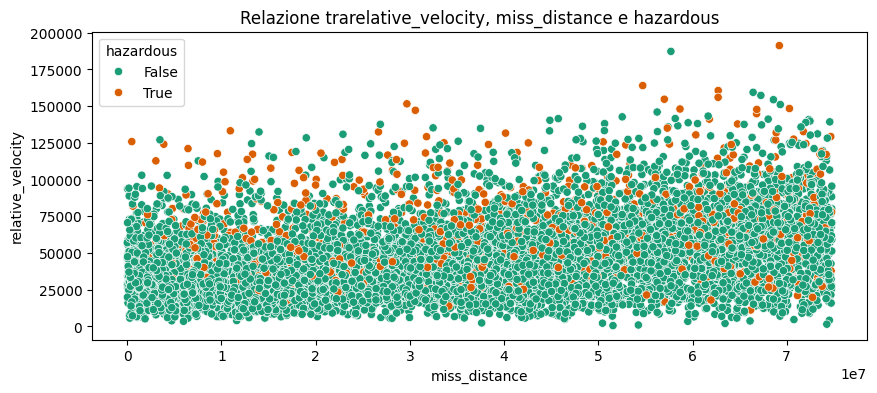

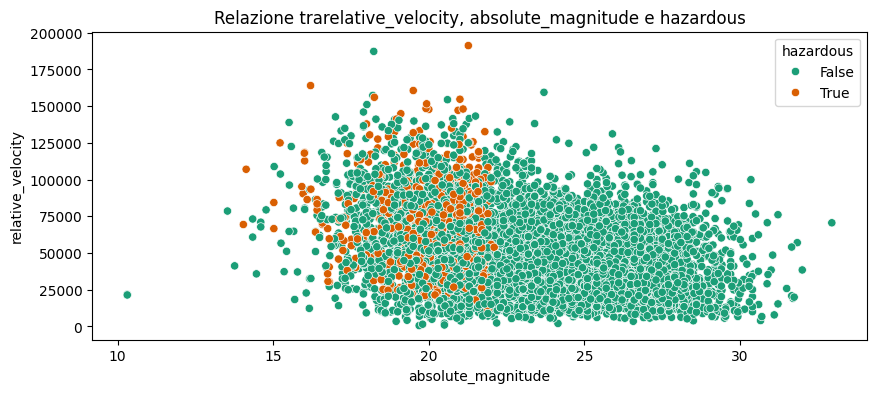

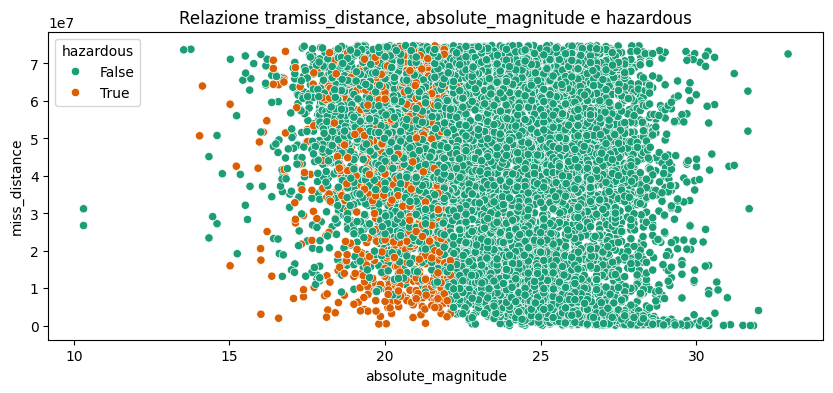

In [ ]:
var_list = df.columns.tolist()

var_list.remove("hazardous")
var_list.remove("id")
var_list.remove("Bin")

length_var_list = len(var_list)

for x in range (0, length_var_list):
    a = var_list[0]
    var_list.remove(a)
    length_var_list = length_var_list - 1

    for b in var_list:
        scatterPlot(a, b, "hazardous", df_sampled)